In [80]:
import re 
import nltk 
import string 
import warnings 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

Import CSV Data Files

In [82]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Exploratory Data Analysis 

In [83]:
train[train['target'] == 1].head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [84]:
train[train['target'] == 0].head(3)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0


In [85]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [86]:
train.shape

(7613, 5)

In [87]:
test.shape

(3263, 4)

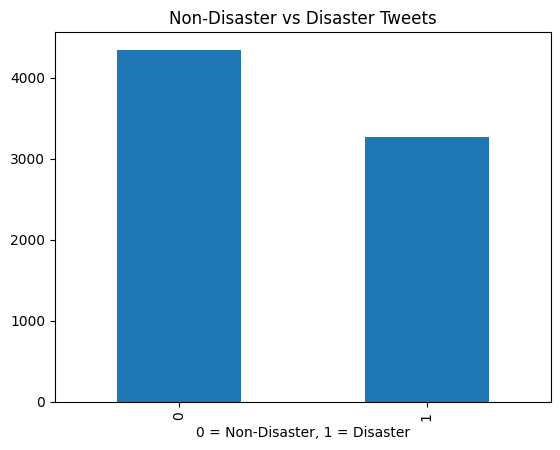

In [88]:
ax = train['target'].value_counts().sort_index()\
    .plot(
        kind = 'bar',
        title = 'Non-Disaster vs Disaster Tweets'
    )

ax.set_xlabel("0 = Non-Disaster, 1 = Disaster")
plt.show()

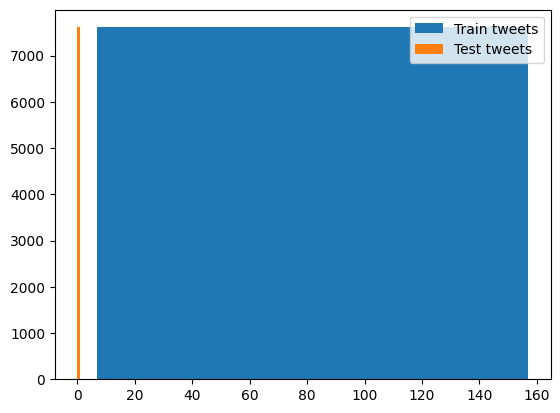

In [89]:
length_train = train['text'].str.len()
target_train = train['target']

plt.hist(length_train, bins=1,label="Train tweets")
plt.hist(target_train, bins=1,label="Test tweets")

plt.legend()
plt.show()

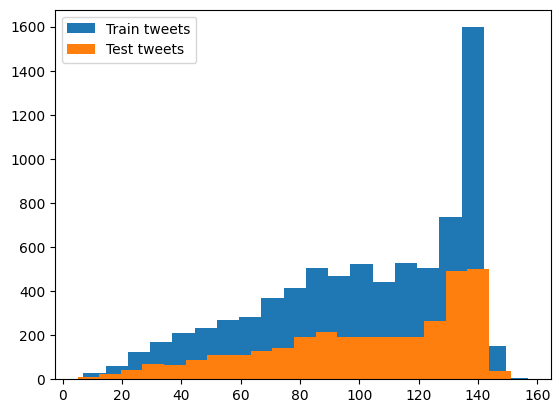

In [90]:
length_train = train['text'].str.len()
length_test = test['text'].str.len()

plt.hist(length_train, bins=20, label="Train tweets")
plt.hist(length_test, bins=20, label="Test tweets")

plt.legend()
plt.show()

In [91]:
combine = train.append(test, ignore_index=True)
combine.shape

/var/folders/mp/60r0v21d3bn_1j9h07mqxny00000gn/T/ipykernel_21244/1712868305.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test, ignore_index=True)


(10876, 5)

In [97]:
clean_pattern = re.compile(r'(@[\w]*)|(https?:\/\/t\.co\/.+)|(#)|([^a-zA-Z0-9\s])|([R][T])')



TypeError: search() missing 1 required positional argument: 'string'

In [ ]:

clean_pattern = re.compile(r'(@[\w]*)|(https?:\/\/t\.co\/.+)|(#)|([^a-zA-Z0-9\s])|([R][T])')

for index, element in enumerate(combine['text']):
    
    
    
    #combine["cleaned"] = re.sub(clean_pattern, '',i)

#combine.head(5)

combine[combine['id'] == 0].head()

IndentationError: expected an indented block after 'for' statement on line 3 (1781070759.py, line 11)

In [ ]:
combine[combine['target'] == 0].head(3)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0.0
16,24,NaN,NaN,I love fruits,0.0
17,25,NaN,NaN,Summer is lovely,0.0


In [ ]:
#combine["Cleaned"] = "test"
#combine.head(5)

,id,keyword,location,text,target,Cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0,test
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,test
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0,test
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0,test
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0,test


In [ ]:
#def remove_pattern(input_text, pattern):
    #for i in input_text:
        #clean_tweets = re.sub(pattern, '', input_text)
    #return clean_tweets
    

In [ ]:
#clean_pattern = re.compile(r'(@[\w]*)|(https?:\/\/t\.co\/.+)|(#)|([^a-zA-Z0-9\s])|([R][T])')

#print(remove_pattern(combine['text'], clean_pattern))


TypeError: expected string or bytes-like object

In [ ]:
#clean_pattern = re.compile(r'(@[\w]*)|(https?:\/\/t\.co\/.+)|(#)|([^a-zA-Z0-9\s])|([R][T])')
#combine["Cleaned"] = np.vectorize(remove_pattern)(combine["text"], clean_pattern)
#combine.head(50)

In [ ]:
#pattern1 = re.compile(r'(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])')

#print(remove_pattern(combine["text"], pattern1))

#combine["Cleaned"] = np.vectorize(remove_pattern)(combine["text"], pattern1)
#combine.head(50)

TypeError: expected string or bytes-like object

In [ ]:
#username = re.compile(r'@[\w]*')
#links = re.compile(r'https?://[A-Za-z0-9./]*')
#hashtag = re.compile(r'#')
#non_alnum = re.compile(r'[^a-zA-Z0-9\s]')

#clean = re.sub(r'(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])', '',text)
#clean.head()

#combine["Cleaned"] = np.vectorize(remove_pattern)(combine["text"],"(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])")
#combine.head(50)

#combine["Cleaned"] = combine["Cleaned"].str.replace('(@[\w]*)|(https?:\/\/[A-Za-z0-9\s]*\.com\/?)|(#)|([^a-zA-Z0-9\s])|([R][T])','')
#combine.head(50)



TypeError: first argument must be string or compiled pattern